#### Pavan Kumar Srikanth Naik (pavankumar.s.naik@gmail.com)

In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv("InterviewData_Activity.csv")
cost = pd.read_csv("InterviewData_Cost.csv")
parsing = pd.read_csv("InterviewData_Parsing.csv")
rev = pd.read_csv("InterviewData_Rev.csv")

In [3]:
cost.head()

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0


In [4]:
rev.head()

,date,source_id,revenue
0,8/1/14,PA0368,5717.0
1,1/31/14,PA0277,1380.0
2,6/9/14,PA0745,7535.0
3,9/1/14,PA0751,2868.0
4,3/12/14,PA0859,10757.0


In [5]:
cost.isnull().count()

date         10000
source_id    10000
cost         10000
dtype: int64

In [6]:
rev.isnull().count()

date         10000
source_id    10000
revenue      10000
dtype: int64

We can see from the above output that there are 10000 rows in both cost and rev, and there are no null values in any column in the given datasets.

#### 1. Join the two datasets (InterviewData_Cost.csv and InterviewData_Rev.csv) by "date" and  "source_id" returning all rows from both regardless of whether there is a match between the two data sets

In [7]:
#Outer join between the two datasets
CostRevO = pd.merge(cost, rev,  how='outer', left_on=['date','source_id'], right_on = ['date','source_id'])

In [8]:
CostRevO.head()

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN


In [9]:
CostRevO.shape[0]

14618

We can see that the total number of rows after joining has increased from 1000(individual dataset) and is less that 2000(both dataset's total rows) on joining the two datasets as expected of an outer join. Thus, all the rows have been returned regradless of a match between the two datasets.

#### 2. Join the two datasets (InterviewData_Cost.csv and InterviewData_Rev.csv) by "date" and  "source_id" returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

In [10]:
#Storing only the values of Cost where Revenue is null from the CostRevO(Outer join of the two datasets) dataframe
CostRevN = CostRevO[(pd.notnull(CostRevO["cost"]) & pd.isnull(CostRevO["revenue"]))]

In [11]:
CostRevN.head()

,date,source_id,cost,revenue
4,11/30/14,PA0923,5586.0,NaN
6,12/17/14,PA0952,6662.0,NaN
7,5/22/14,PA0411,4795.0,NaN
9,10/14/14,PA0168,9651.0,NaN
10,2/13/14,PA0354,2752.0,NaN


In [12]:
CostRevN.isna().sum()

date            0
source_id       0
cost            0
revenue      4609
dtype: int64

In [13]:
CostRevN.shape[0]

4609

There are total 4609 rows where we did not find a match for Cost's date in Revenue's date

#### 3. Using your result from #1, what are the Top 4 sources(“source_id”values) in terms of total revenue generation across this data set? How would you visualize the monthly revenue for those Top 4 sources?

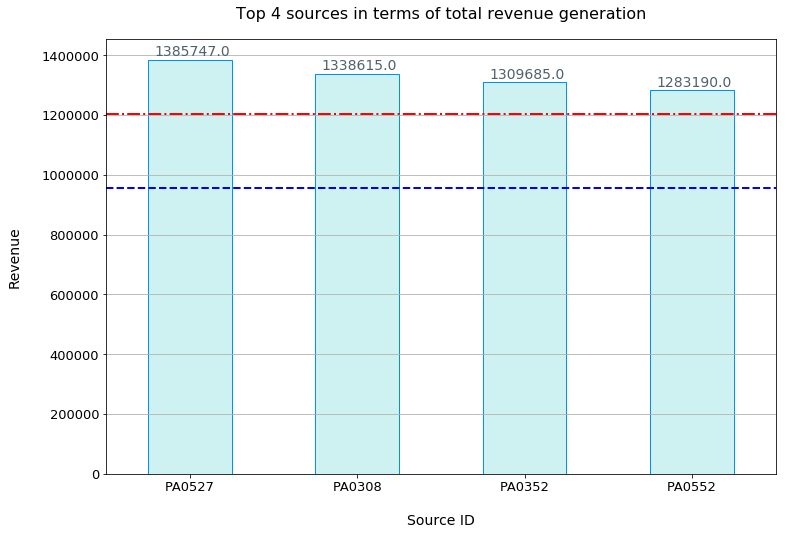

In [14]:
ax = CostRevO.groupby("source_id")["revenue"].sum().sort_values(ascending = False).head(4)\
    .plot.bar(colors="#CEF1F2", figsize=(12,8), fontsize=13, edgecolor='#008FFF')
for i in ax.patches:
    ax.annotate(np.round(i.get_height()), (i.get_x()+i.get_width()/2, i.get_height()),
         ha='center', va='center', color='#4F616B',fontsize =14,
         xytext=(2,8), textcoords='offset points')
ax.yaxis.grid()
ax.set_title('Top 4 sources in terms of total revenue generation', fontsize=16, color='black', pad=20)
ax.axhline(CostRevO.groupby("source_id")["revenue"].sum().min(), color='blue', linewidth=2, linestyle='--')
ax.axhline(CostRevO.groupby("source_id")["revenue"].sum().median(), color='red', linewidth=2, linestyle='-.')
plt.ylabel('Revenue',fontsize=14, color='black')
plt.xlabel('Source ID',fontsize=14, color='black')
plt.xticks(rotation=0)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
plt.show()

The above bar graph depicts the total revenue generation of the top 4 sources across the dataset.  The median line (red color) shows the measure of central tendency revenue generation in comparision to other sources and the minimum line (blue color) shows the least revenue generated across the dataset.

In [15]:
CostRevO.groupby("source_id")["revenue"].sum().sort_values(ascending = False).head(4)

source_id
PA0527    1385747.0
PA0308    1338615.0
PA0352    1309685.0
PA0552    1283190.0
Name: revenue, dtype: float64

In [16]:
CostRevO['date'] = pd.to_datetime(CostRevO['date'])

In [17]:
CostRevO['month'] = CostRevO.date.dt.strftime('%m')

In [18]:
CostRevO['Year'] = CostRevO.date.dt.strftime('%Y') 

In [19]:
CostRevO['Year'].unique()
#Since all the data is of 2014 we will only be using variable months in x axis

array(['2014'], dtype=object)

In [20]:
RevG = CostRevO.groupby(["source_id","month"]).agg({ "revenue" : "sum"})
RevG = RevG['revenue'].to_frame().reset_index()

In [21]:
A = RevG[RevG['source_id'] == 'PA0527']
B = RevG[RevG['source_id'] == 'PA0308']
C = RevG[RevG['source_id'] == 'PA0352']
D = RevG[RevG['source_id'] == 'PA0552']

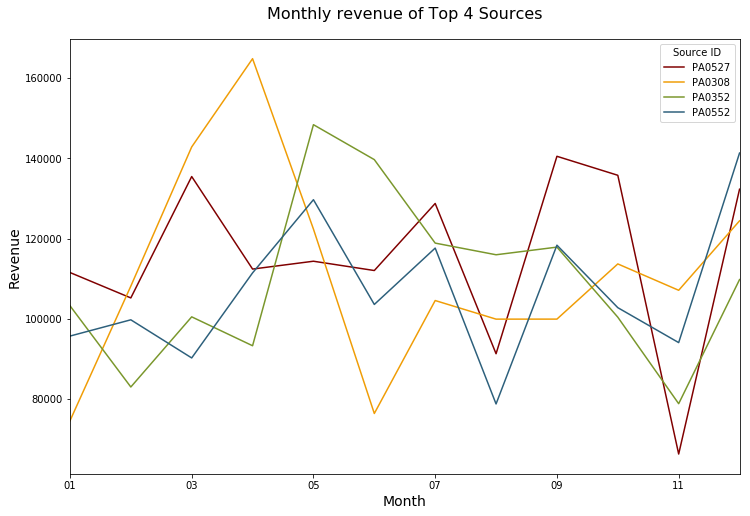

In [22]:
x=range(1,13)
fig = plt.figure(figsize = (12,8))
A.groupby(RevG["month"])["revenue"].sum().plot.line(color='#800000')
B.groupby(RevG["month"])["revenue"].sum().plot.line(color='#f09d06')
C.groupby(RevG["month"])["revenue"].sum().plot.line(color='#7a972c')
D.groupby(RevG["month"])["revenue"].sum().plot.line(color='#2d607c')
plt.legend(['PA0527', 'PA0308', 'PA0352', 'PA0552'], title='Source ID')
plt.title('Monthly revenue of Top 4 Sources', fontsize=16, color='black', pad=20)
plt.ylabel('Revenue',fontsize=14, color='black')
plt.xlabel('Month',fontsize=14, color='black')
plt.show()

The graph above is a multiple lines plot which shows the revenue trend analysis of the Top 4 sources across the months .i.e, monthly revenue generated by the top 4 sources. The line plot shows the sum of generated revenue data in a trend in each source across 12 months.

#### 4. Assuming you’ve read the data into a Pandas DataFrame called df, run the following code to build a basic logistic regression model:

In [23]:
dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.ix[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.ix[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.ix[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'], activity_data[explanatory_cols], family=sm.families.Binomial())
result = full_logit_model.fit()

#### Apply this model to the same data that the model was trained on and assess the prediction accuracy

In [24]:
def cm(y, X):
    pred = []
    for i in result.predict(X).tolist():
        pred.append(1) if i >= 0.5 else pred.append(0)
    print(metrics.confusion_matrix(y, pred))
    print(classification_report(y, pred))
cm(activity_data['active'], activity_data[explanatory_cols])

[[1626 1164]
 [1109 1521]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      2790
           1       0.57      0.58      0.57      2630

    accuracy                           0.58      5420
   macro avg       0.58      0.58      0.58      5420
weighted avg       0.58      0.58      0.58      5420



On applying the model to the same data it can be seen that it predicted if a member was active or not with aan accuracy of 58%

#### 5. Split the data into training and test samples, and build a model over the training data using the following Python code

In [25]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],
training_data[explanatory_cols],
family=sm.families.Binomial()) 
training_result = training_logit_model.fit()

#### Assess the training data model’s accuracy on the test data. Why does the accuracy change so much?

In [26]:
cm(test_data['active'], test_data[explanatory_cols])

[[787 503]
 [ 53  76]]
              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1290
           1       0.13      0.59      0.21       129

    accuracy                           0.61      1419
   macro avg       0.53      0.60      0.48      1419
weighted avg       0.86      0.61      0.69      1419



We applied the model that had already used the same data in the first instance whereas, in the second model the testing data allowed to test our model on data that was independent of our training data. The model turned out to be predicting apporximately the same precision, recall, and f1-score with the test data as expected of a good model. The accuracy changed as a result of bias from our first case in comparision to the second case.

#### 6. This data comes from a subset of user data JSON blobs stored in our database. Parse out the values (stored in the “data_to_parse” column) into four separate columns. 

In [27]:
parsing.head()

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


In [28]:
parsing['data_to_parse'] = parsing['data_to_parse'].map(lambda x: x.lstrip('"value":"').rstrip('"}]'))
parsing[['Value1','Value2', 'Value3', 'Value4']] = parsing.data_to_parse.str.split(";",expand=True,)

In [29]:
parsing.head(10)

,userid,data_to_parse,Value1,Value2,Value3,Value4
0,54f3ad9a29ada,N;U;A7;W,N,U,A7,W
1,54f69f2de6aec,N;U;I6;W,N,U,I6,W
2,54f650f004474,Y;U;A7;W,Y,U,A7,W
3,54f52e8872227,N;U;I1;W,N,U,I1,W
4,54f64d3075b72,Y;U;A7;W,Y,U,A7,W
5,54f69dc01793f,N;U;A1;W,N,U,A1,W
6,54f5d26833ce6,N;U;A1;W,N,U,A1,W
7,54f52b1a7e647,N;U;A4;W,N,U,A4,W
8,54f4ae7da8d01,N;U;A1;W,N,U,A1,W
9,54f6290ca187d,N;U;U;W,N,U,U,W


As we can see in the above dataframe, the data_to_parse column has been parsed into 4 seperate columns with values.

### Additional Question - C

#### When we introduce new products or features, we generally prefer to implement them as a test at first – sometimes though, we don't have that option. Imagine that on the operations side, which deals primarily with shoppers, we decide to revamp the way in which potential orders (from a member) are offered to a shopper (they can either ignore the notification, decline it, or accept it). We’ve got 60 days of data under the old system and 60 days after the revamp was implemented, we’re hoping to figure out whether it led to an increase in offer acceptance rate (proportion of accepts out of all the response options). How might you go about trying to quantify the change due to the revamp?

In order to quantify the change due to the revamp we can perform Hypothesis testing using t-test.

T-test boils down all the values to one value - t-value. The calculations compare the sample mean(s) to the null hypothesis and incorporates both the sample size and the variability in the data.

#### Null Hypothesis: Increase in offer acceptance rate due to the revamp
#### Alternate Hypothesis: Offer acceptance rate did not increase due to the revamp

To calculate the t-value we need to calculate the acceptance rate and generate the distribution across each i.e., the data under the old system before the revamp was implemented and the data under the new system after the revamp was implemented. Then we calculate the sample mean and standard deviations, the t-value and p-value using stats from sciPy. 

#### With a confidence of 95% (0.05 p) we reject our null hypothesis if the calculated p-value is greater than 0.05 and accept the alternate hypothesis i.e., the Offer acceptance rate did not increase due to the revamp. 

#### If our calculated p-value is lesser than 0.05 we accept the null hypothesis with 95% i.e., there was an increase in offer acceptance rate due to the revamp. 

Also, the difference between the averages of both data would tell us the degree of increase/decrease offer acceptance.